In [49]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("../data/train.csv",low_memory=False,parse_dates=[2])
print(train.shape)
train.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [5]:
test=pd.read_csv("../data/test.csv",parse_dates=[2])
print(test.shape)
test.head()

(41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
test.dtypes

Id                 int64
Store              int64
DayOfWeek         object
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [7]:
store=pd.read_csv("../data/store.csv")
print(store.shape)
store.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
ss = pd.read_csv("../data/sample_submission.csv")
print(ss.shape)
ss.head()

(41088, 2)


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [9]:
# plot missing values percentage
def missing_perc(df):
    # Check the percentage of missing values in every column
    ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 7))
    plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

    for p in ax.patches:
        percentage ='{:,.2f}%'.format((p.get_width()/df.shape[0])*100)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax.annotate(percentage,(x,y))

In [10]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [12]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
train_df=train.merge(store,how='left',on='Store')

In [14]:
test_df=test.merge(store,how='left',on='Store')

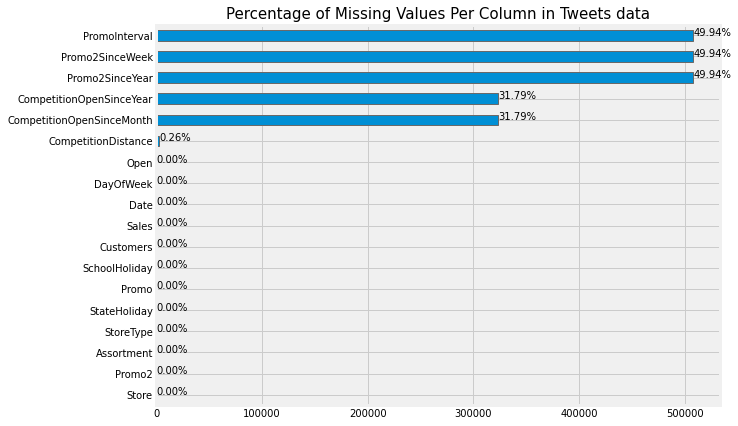

In [15]:
missing_perc(train_df)

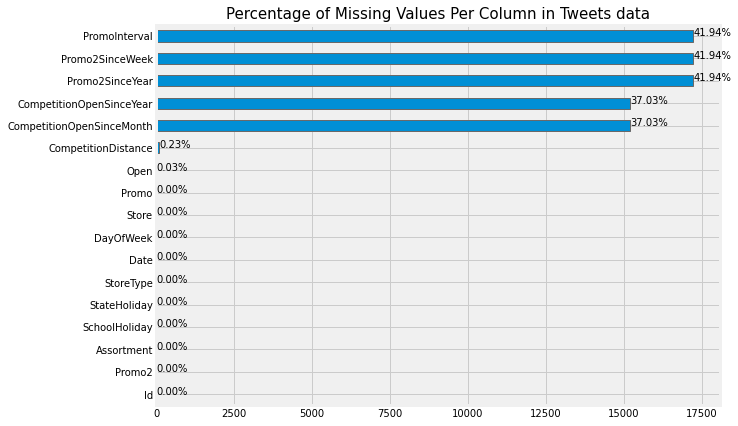

In [16]:
missing_perc(test_df)

In [21]:
# Replace the holidays value the actual name

In [30]:
train_df.replace({'StateHoliday':{'a':'Public Holiday','b':'Easter Holiday','c':'Christmas','0':'None'}},inplace=True)
test_df.replace({'StateHoliday':{'a':'Public Holiday','b':'Easter Holiday','c':'Christmas','0':'None'}},inplace=True)

In [24]:
cat_cols=['StateHoliday','StoreType','Assortment','PromoInterval']

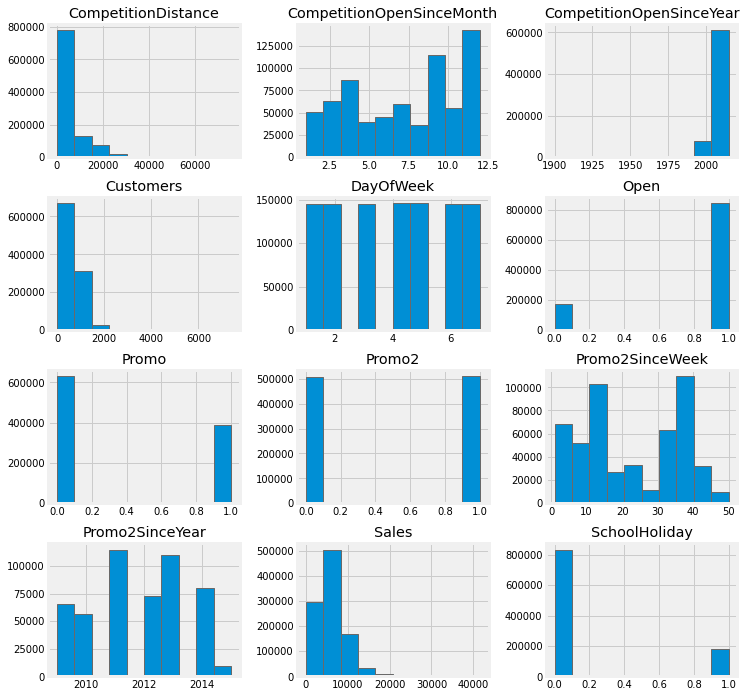

In [17]:
_=train_df[list(train_df.columns.difference(['Store']))].hist(figsize=(11,12))

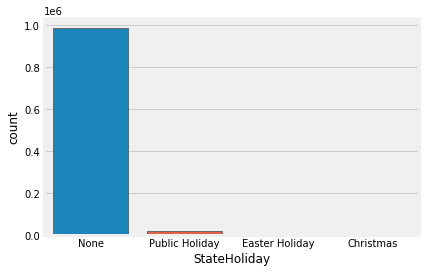

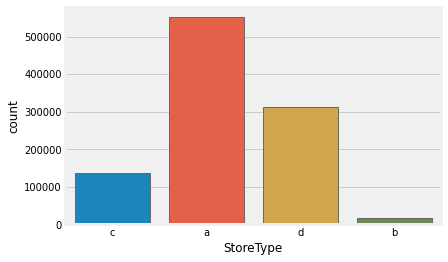

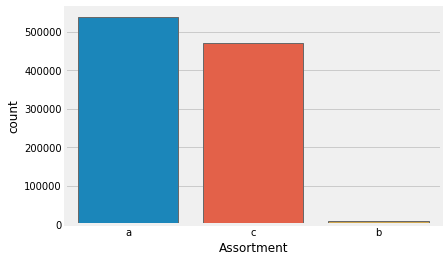

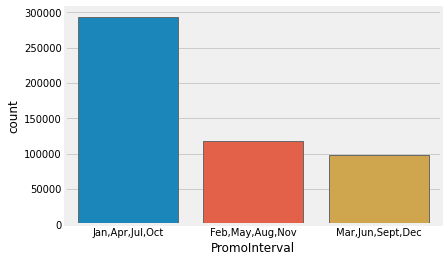

<Figure size 432x288 with 0 Axes>

In [28]:
for col in cat_cols:
    sns.countplot(x=col,data=train_df)
    plt.figure()

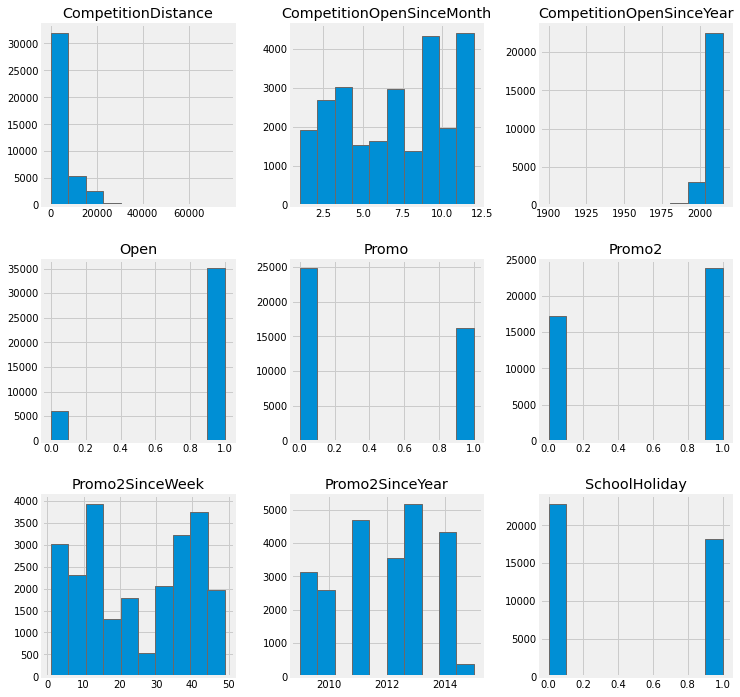

In [18]:
_=test_df[list(test_df.columns.difference(['Id','Store']))].hist(figsize=(11,12))

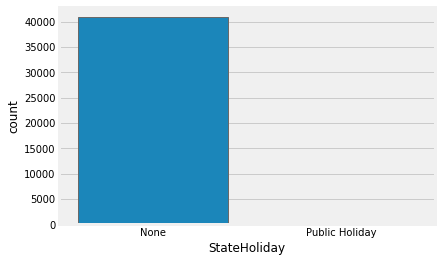

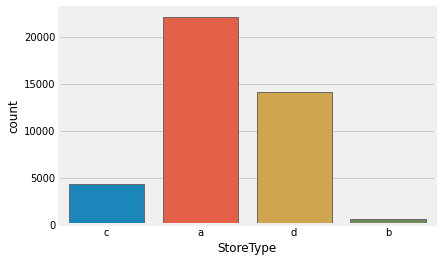

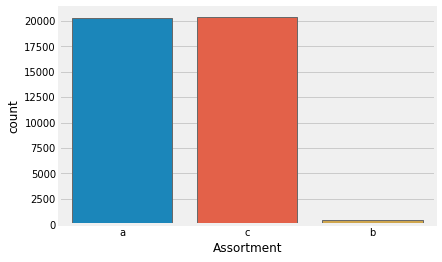

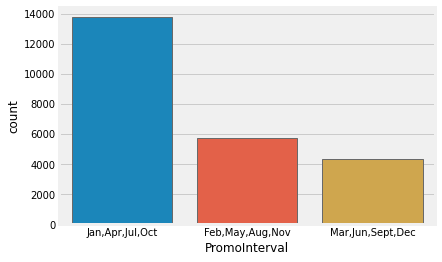

<Figure size 432x288 with 0 Axes>

In [31]:
for col in cat_cols:
    sns.countplot(x=col,data=test_df)
    plt.figure()

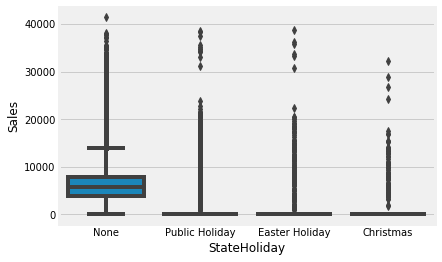

In [32]:
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
_=sns.boxplot(x='StateHoliday',y='Sales',data=train_df)

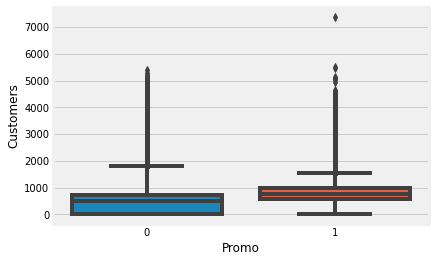

In [33]:
_=sns.boxplot(x='Promo',y='Customers',data=train_df)

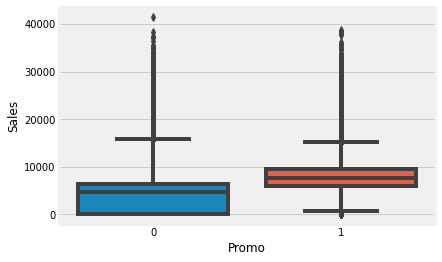

In [34]:
_=sns.boxplot(x='Promo',y='Sales',data=train_df)

In [35]:
mpl.rcParams['agg.path.chunksize'] = 10000

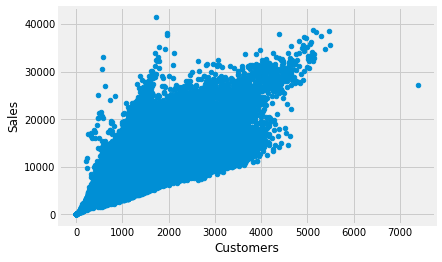

In [36]:
_=train_df.plot(kind='scatter',x='Customers',y='Sales')

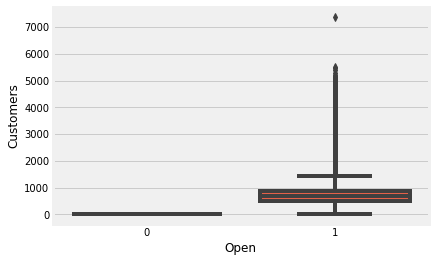

In [37]:
_=sns.boxplot(x='Open',y='Customers',data=train_df)

In [33]:
# train.set_index('Date',inplace=True,drop=True)

In [242]:
# test.set_index('Date',inplace=True,drop=True)

In [39]:
train_grouped=train_df.groupby(by='Date').aggregate({'Sales':'sum','Customers':'sum','StateHoliday':'unique'})

In [40]:
train_grouped['StateHoliday']=train_grouped['StateHoliday'].apply(lambda x: x[0])

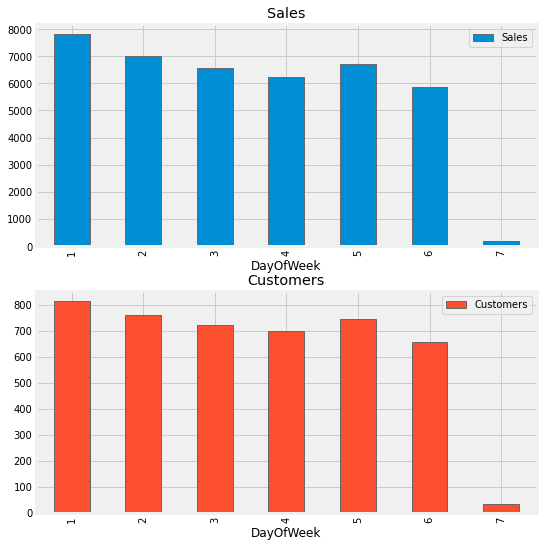

In [41]:
_=train_df.groupby(by='DayOfWeek').agg({'Sales':'mean','Customers':'mean'}).plot(kind='bar',
                                                                                 subplots=True,figsize=(8,9),sharex=False)

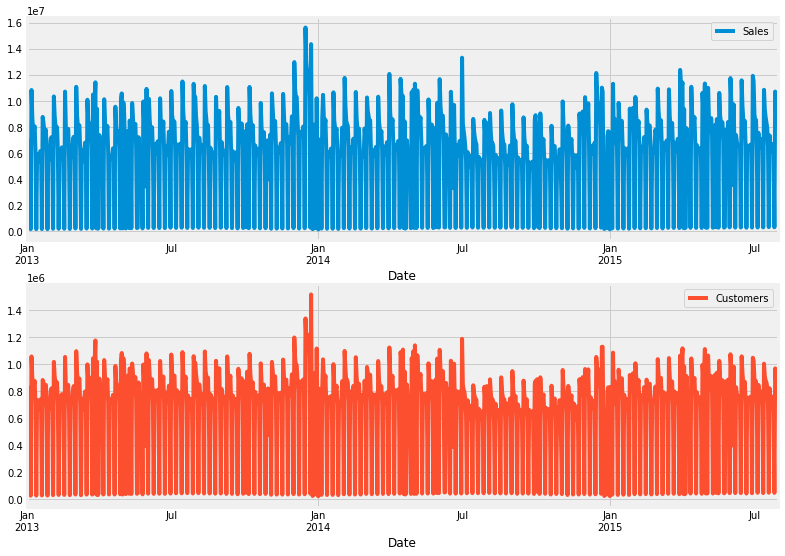

In [42]:
_=train_grouped[['Sales','Customers']].plot(subplots=True,figsize=(12,9),sharex=False)

In [43]:
public_holiday=train_grouped.query("StateHoliday=='Public Holiday'").index
xmas=train_grouped.query("StateHoliday=='Christmas'").index
easter=train_grouped.query("StateHoliday=='Easter Holiday'").index

In [44]:
#plot lines
def highlight_datetimes(indices, ax):
    i = 0
    while i < len(indices)-1:
        ax.axvspan(df.index[indices[i]], df.index[indices[i] + 1], facecolor='green', edgecolor='none', alpha=.5)
        i += 1

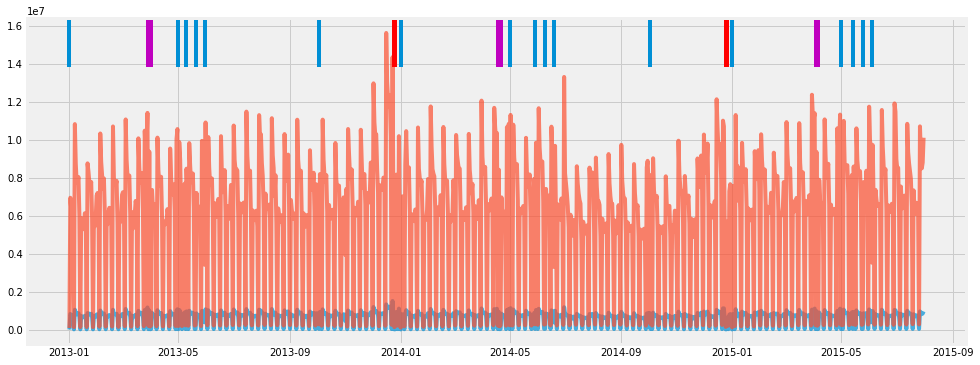

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,figsize=(15,6))

for v in train_grouped.columns.difference(['StateHoliday']).tolist():
    axes.plot(train_grouped[v], label=v, alpha=.7)

#highlight areas
# highlight_datetimes(public_holiday, axes)
for i in public_holiday:
    plt.axvline(i,label='Public Holiday',ymin=0.85)

for i in easter:
    plt.axvline(i,color='m',label='Easter',ymin=0.85)

for i in xmas:
    plt.axvline(i,color='r',label='Christmas',ymin=0.85)


Text(0, 0.5, 'Correlation Coefficient')

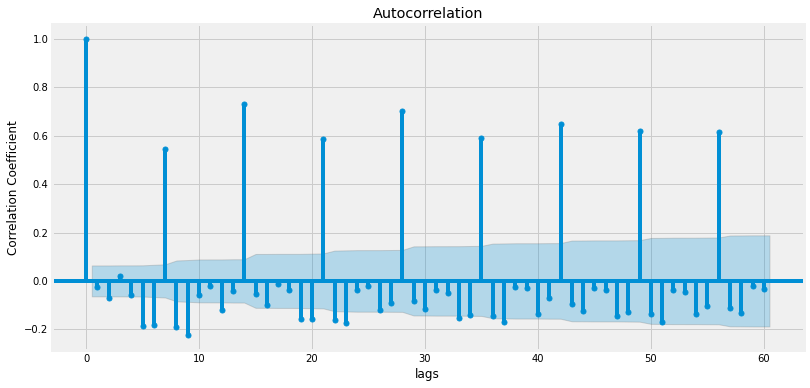

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(12, 6))
# posbound=1.96/np.sqrt(len(train_grouped['Sales']))
# negbound=-1.96/np.sqrt(len(train_grouped['Sales']))
plot_acf(train_grouped['Sales'],lags=60,ax=ax);
# plt.hlines(posbound,1,240,'r',label='95% Confidence bounds')
# plt.hlines(negbound,1,240,'r')
plt.xlabel("lags")
plt.ylabel("Correlation Coefficient")
# plt.legend()

In [51]:
train_grouped

,Sales,Customers,StateHoliday
Date,,,
2013-01-01,97235,19491,Public Holiday
2013-01-02,6949829,834075,None
2013-01-03,6347820,761040,None
2013-01-04,6638954,782137,None
2013-01-05,5951593,687472,None
...,...,...,...
2015-07-27,10707292,970462,None
2015-07-28,9115073,876092,None
2015-07-29,8499962,828524,None


In [103]:
# train_df['DayOfWeek'].value_counts()
# train_df.query("Open==1 &(DayOfWeek==6 or DayOfWeek==7)")